In [2]:
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Load embeddings
output_path = "/home/maria/Downloads/scotus_embeddings.npy"
embeddings = np.load(output_path)
# Apply PCA
pca = PCA(n_components=3)
pca_result_ = pca.fit_transform(embeddings)[:2000]

# Convert to DataFrame
df = pd.DataFrame(pca_result_, columns=["PC1", "PC2", "PC3"])

# Plot interactive 3D scatter plot
fig = px.scatter_3d(df, x="PC1", y="PC2", z="PC3", opacity=0.6, title="Interactive 3D PCA Visualization of SCOTUS Embeddings", color=range(2000))

fig.update_traces(marker=dict(size=3, line=dict(width=0.5, color="black")))
fig.show()


2025-03-16 02:24:25,534 [INFO] normalizing data across axis=1
2025-03-16 02:24:25,555 [INFO] projecting out mean along axis=0
2025-03-16 02:24:25,572 [INFO] data normalized, 0.04sec
2025-03-16 02:24:25,579 [INFO] sorting activity: 3072 valid samples by 1000 timepoints
2025-03-16 02:24:28,050 [INFO] n_PCs = 200 computed, 2.52sec
2025-03-16 02:24:28,525 [INFO] 100 clusters computed, time 2.99sec
2025-03-16 02:24:38,991 [INFO] clusters sorted, time 13.46sec
2025-03-16 02:24:39,163 [INFO] clusters upsampled, time 13.63sec
2025-03-16 02:24:39,173 [INFO] rastermap complete, time 13.64sec


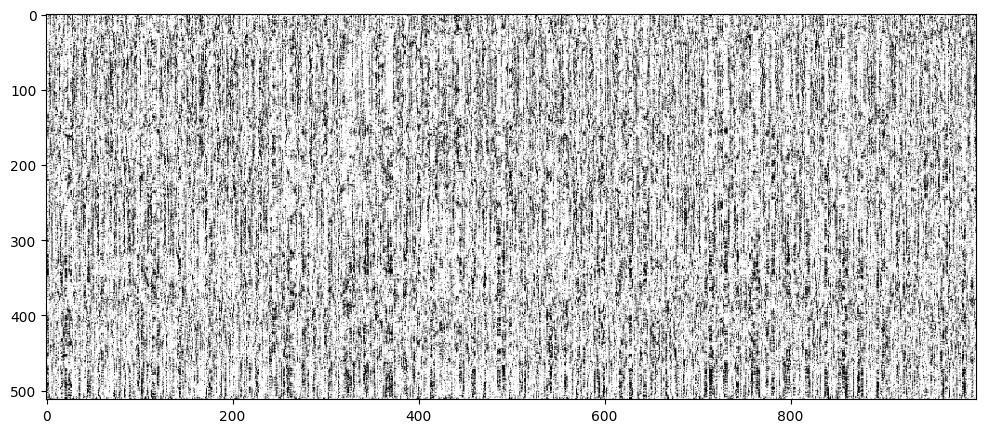

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap

# spks is neurons by time
spks = np.load(output_path).astype("float32")[:1000].T

# fit rastermap
model = Rastermap(n_PCs=200, n_clusters=100, 
                  locality=0.75, time_lag_window=5).fit(spks)
y = model.embedding # neurons x 1
isort = model.isort

# visualize binning over neurons
X_embedding = model.X_embedding

# plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")
